# 🚢🛳 Titanic Prediction 🛳🚢

# PART 00

# Step1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step2: Read Datasets

In [3]:
TT_df = pd.read_csv("Titanic.csv")
TT_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Step3: Check out the Data

In [4]:
#overview
TT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#cheking for missing data
TT_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Step4: Data preparation 
<hr>
<h2>Dealing with Missing Data

In [6]:
#drop unnecessary columns [PassengerId, Name, Ticket, Cabin]  

TT_df = TT_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1 )

In [7]:
#fill the missing data in Age column by Age column median

TT_df['Age']=TT_df['Age'].fillna(TT_df['Age'].median())

In [8]:
#trying to know aboat maximum category in "Embarked" column
 
TT_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#fill the missing data in Embarked column by "S" str because "S" category is maximum

TT_df['Embarked'] = TT_df['Embarked'].fillna("S")

#### Hint: Now, we don't have any Missing Data.

In [10]:
# Now, we don't have any Missing Data ;)
TT_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
#overview
TT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


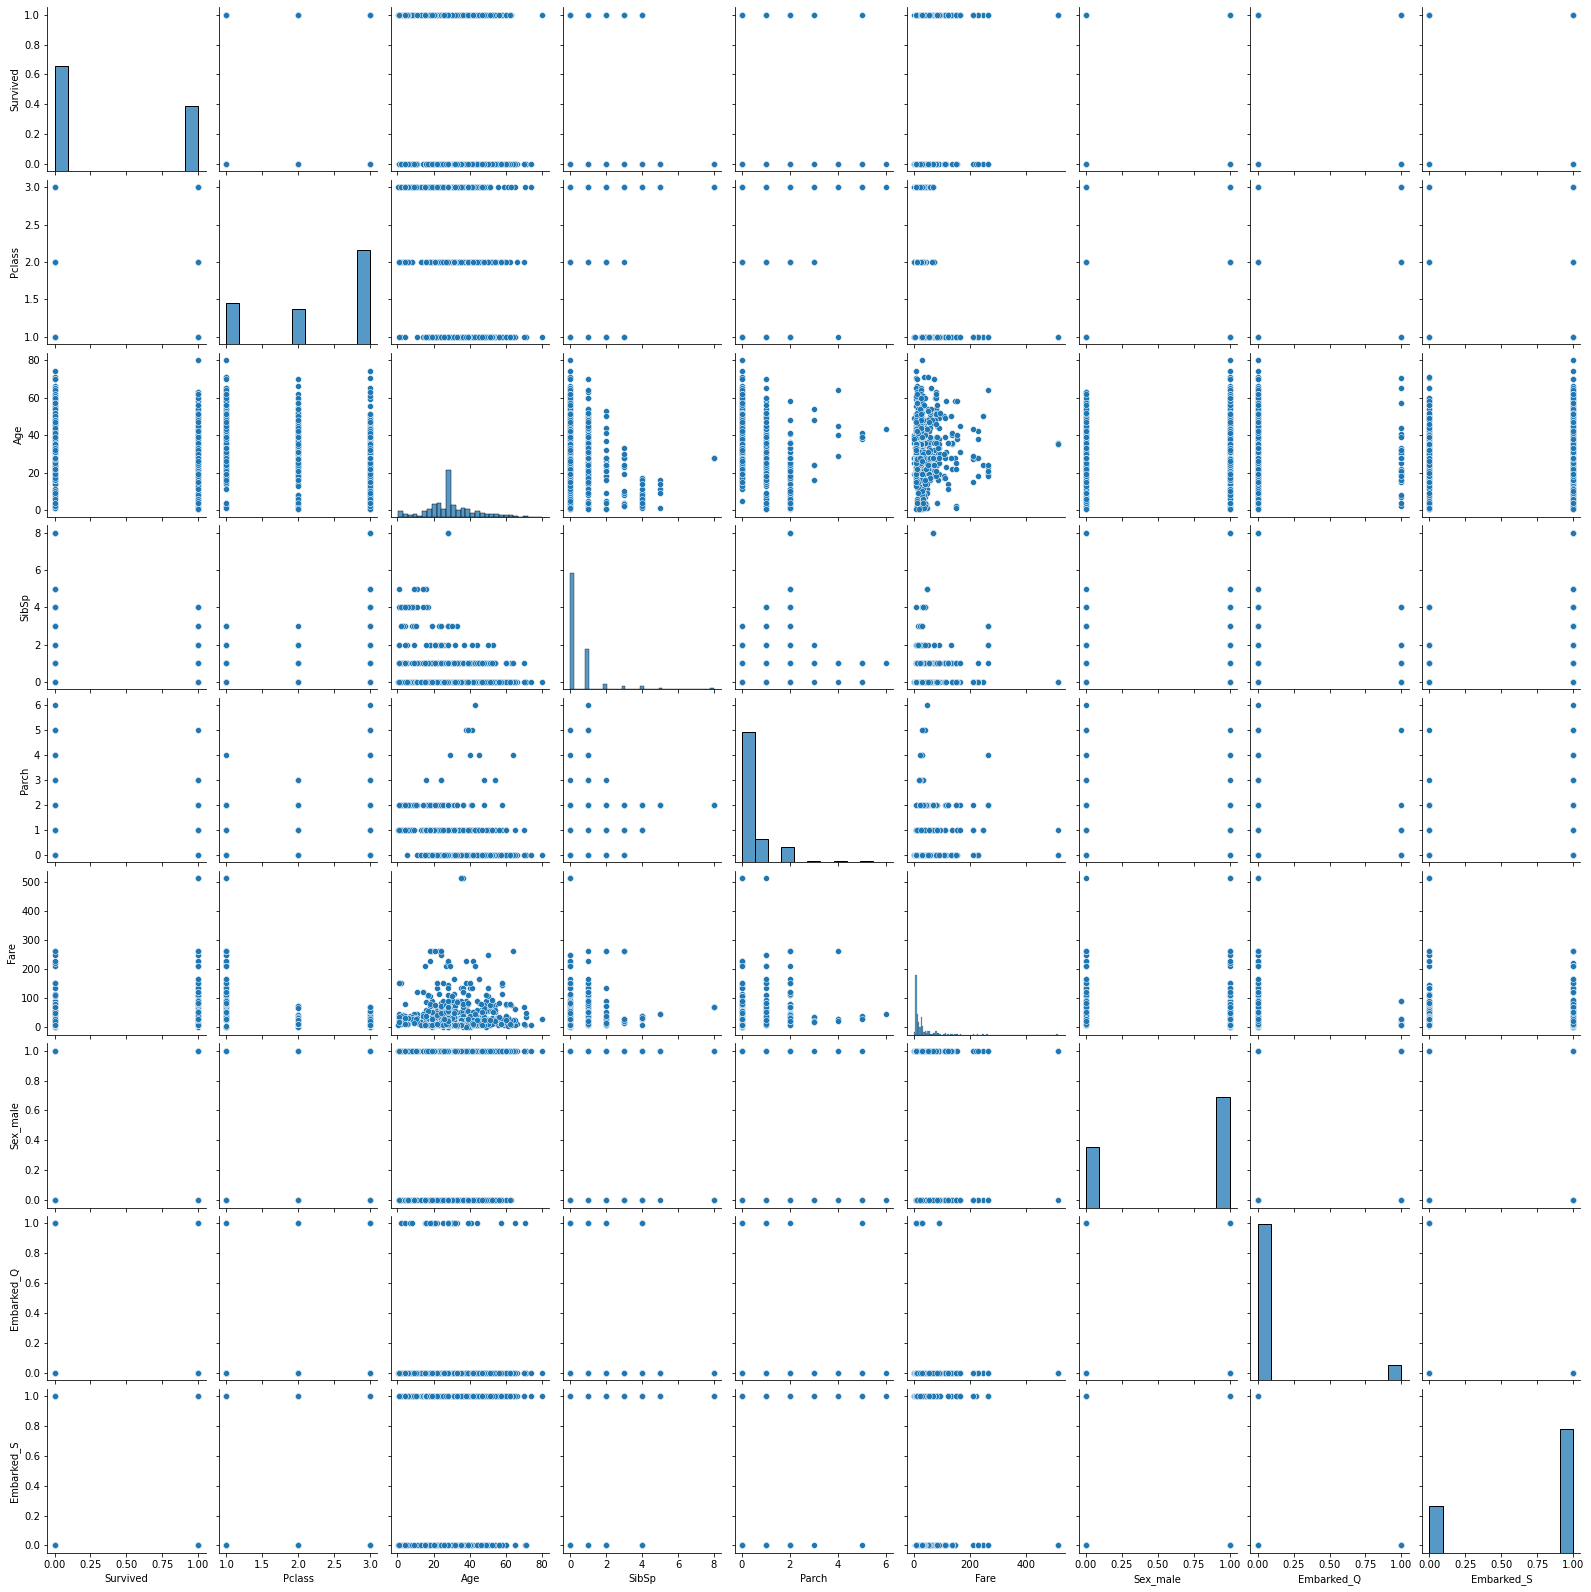

In [154]:
sns.pairplot(TT_df)

## 🟣Creating Dummy Variables

In [12]:
#apply onehot encoding to dataset

TT_df = pd.get_dummies(TT_df,drop_first = True)
TT_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# Step5: Train Test Split

In [13]:
X= TT_df.drop('Survived', axis=1)
y= TT_df['Survived']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=818)

# Step6: Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler= StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

# PART 01

# Step7: Build the model ---> Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
Logistic_model= LogisticRegression()

In [24]:
Logistic_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [25]:
Logistic_model.coef_

array([[-0.89057265, -0.50456159, -0.33682687, -0.04651441,  0.25023546,
        -1.27825067,  0.04005841, -0.14979423]])

# Step8: Predict

In [26]:
y_pred= Logistic_model.predict(scaled_X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0], dtype=int64)

# Step9: Evaluate model

## 🟣 Confusion Matrix

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score, precision_score, f1_score

In [28]:
accuracy_score(y_test, y_pred)

0.7873134328358209

In [29]:
confusion_matrix(y_test, y_pred)

array([[136,  23],
       [ 34,  75]], dtype=int64)

### Classification Report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       159
           1       0.77      0.69      0.72       109

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



### Plot Confusion Matrix

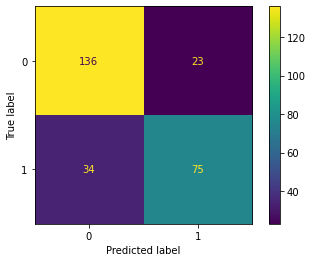

In [32]:
plot_confusion_matrix(Logistic_model, scaled_X_test, y_test)

## 🟣 Accuracy Score

In [33]:
AS = accuracy_score(y_test, y_pred)
AS

0.7873134328358209

## 🟣 Precision Score

In [34]:
PS = precision_score(y_test, y_pred)
PS

0.7653061224489796

## 🟣 Recall score

In [41]:
RS = recall_score(y_test, y_pred)
RS

0.6880733944954128

## 🟣 F1-score

In [35]:
FS = f1_score(y_test, y_pred)
FS

0.7246376811594203

## 🟣 Curves & AUC

### Plot Precision Recall Curve

In [36]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

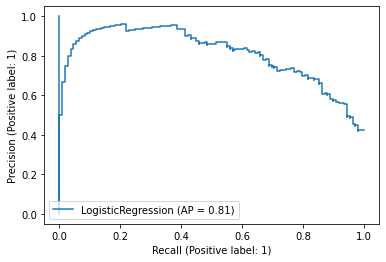

In [38]:
plot_precision_recall_curve(Logistic_model, scaled_X_test, y_test)

### Plot Roc Curve

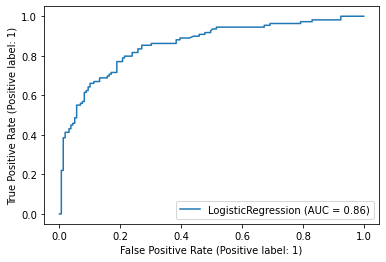

In [39]:
plot_roc_curve(Logistic_model, scaled_X_test, y_test)

# Step10: Create DataFrame From Accuracy & Precision & Recall & F1-score

In [139]:
Logistic_M_df = pd.DataFrame({"Logistic Metrics" : ["Accuracy", "Precision", "Recall", "F1-score"] , "Logistic Scores" : [AS, PS, RS, FS ]})
Logistic_M_df

,Logistic Metrics,Logistic Scores
0,Accuracy,0.787313
1,Precision,0.765306
2,Recall,0.688073
3,F1-score,0.724638


# PART 02

# Step11: Build the model ---> KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_model= KNeighborsClassifier(n_neighbors=1)

In [45]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Step12: Predict

In [47]:
y_pred= knn_model.predict(scaled_X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0], dtype=int64)

# Step13: Evaluate model

## 🟣 Confusion Matrix

In [48]:
confusion_matrix(y_test, y_pred)

array([[133,  26],
       [ 35,  74]], dtype=int64)

### Plot Confusion Matrix

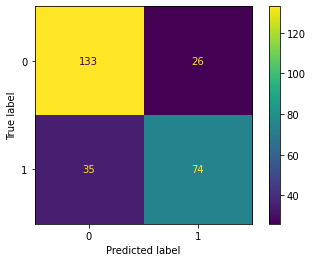

In [49]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test)

### Classification Report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       159
           1       0.74      0.68      0.71       109

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



## 🟣 Accuracy Score

In [51]:
accuracy_score(y_test, y_pred)

0.7723880597014925

## 🟣 Precision Score

In [52]:
precision_score(y_test, y_pred)

0.74

## 🟣 Recall score

In [53]:
recall_score(y_test, y_pred)

0.6788990825688074

## 🟣 F1-score

In [54]:
f1_score(y_test, y_pred)

0.7081339712918661

# Step14: Elbow Method for Choosing Reasonable K Values

In [55]:
test_error_rate= []


for k in range (1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [150]:
test_error_rate

[0.2276119402985075,
 0.2126865671641791,
 0.19029850746268662,
 0.18656716417910446,
 0.17537313432835822,
 0.19402985074626866,
 0.17164179104477617,
 0.17910447761194026,
 0.18656716417910446,
 0.19402985074626866,
 0.18283582089552242,
 0.17910447761194026,
 0.17537313432835822,
 0.17910447761194026,
 0.17910447761194026,
 0.17910447761194026,
 0.17537313432835822,
 0.19029850746268662,
 0.19029850746268662,
 0.19402985074626866,
 0.1977611940298507,
 0.20149253731343286,
 0.20149253731343286,
 0.20149253731343286,
 0.20149253731343286,
 0.20149253731343286,
 0.20149253731343286,
 0.20149253731343286,
 0.2126865671641791]

### Plot

Text(0.5, 0, 'K Value')

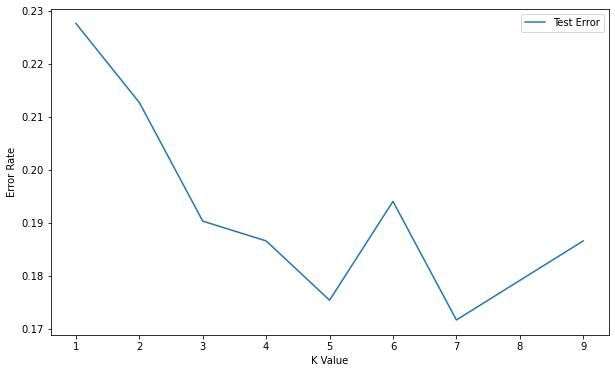

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

# Step15: Creating a Pipeline to find best K value

In [58]:
scaler= StandardScaler()

In [59]:
knn= KNeighborsClassifier()

In [60]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations= [('scaler', scaler), ('knn', knn)]

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe= Pipeline(operations)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_values= list(range(1, 20))

In [66]:
param_grid= {'knn__n_neighbors': k_values}

In [67]:
full_cv_classifier= GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [68]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [69]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=8))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=8),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 8,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [71]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

# Step16: Final Model

## 🟣 Fit model with the best K value

In [72]:
scaler= StandardScaler()
knn8= KNeighborsClassifier(n_neighbors=8)
operations= [('scaler', scaler), ('knn8', knn8)]

In [73]:
pipe= Pipeline(operations)

In [74]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn8', KNeighborsClassifier(n_neighbors=8))])

## 🟣 Predict

In [75]:
pipe_pred= pipe.predict(X_test)

## 🟣 Evaluating the Model

### Confusion Matrix

In [76]:
confusion_matrix(y_test, pipe_pred)

array([[147,  12],
       [ 36,  73]], dtype=int64)

#### Classification Report

In [77]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       159
           1       0.86      0.67      0.75       109

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



#### Plot Confusion Matrix

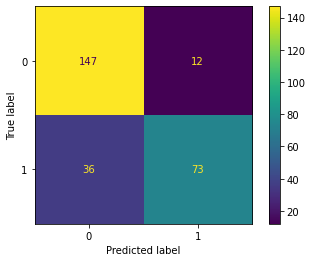

In [78]:
plot_confusion_matrix(pipe, X_test, y_test)

### Acuracy

In [79]:
ASp = accuracy_score(y_test, pipe_pred)
ASp

0.8208955223880597

### Precision Score

In [80]:
PSp = precision_score(y_test, pipe_pred)
PSp

0.8588235294117647

### Recall score

In [81]:
RSp = recall_score(y_test, pipe_pred)
RSp

0.6697247706422018

### F1-score

In [82]:
FSp = f1_score(y_test, pipe_pred)
FSp

0.7525773195876289

### Predict with a sample

In [150]:
#select two row as sample 
sample = X.iloc[[8,18]]

In [153]:
#predicting sample
pipe_pred_sample = pipe.predict(sample)
pipe_pred_sample

array([1, 0], dtype=int64)

# Step17: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [138]:
pipe_M_df = pd.DataFrame({"Pipe Metrics" : ["Accuracy", "Precision", "Recall", "F1-score"] , "Pipe Scores" : [ASp, PSp, RSp, FSp ]})
pipe_M_df

,Pipe Metrics,Pipe Scores
0,Accuracy,0.820896
1,Precision,0.858824
2,Recall,0.669725
3,F1-score,0.752577


# PART 03

# Step18: Build the model ---> SVM

In [84]:
from sklearn.svm import SVC

In [96]:
SVC_model= SVC()

In [97]:
SVC_model.fit(X_train, y_train)

SVC()

# Step19: Predict

In [98]:
y_pred= SVC_model.predict(X_test)

# Step20: Evaluate model

## 🟣 Confusion Matrix

In [99]:
confusion_matrix(y_test, y_pred)

array([[147,  12],
       [ 82,  27]], dtype=int64)

### Classification Report

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       159
           1       0.69      0.25      0.36       109

    accuracy                           0.65       268
   macro avg       0.67      0.59      0.56       268
weighted avg       0.66      0.65      0.60       268



### Plot Confusion Matrix

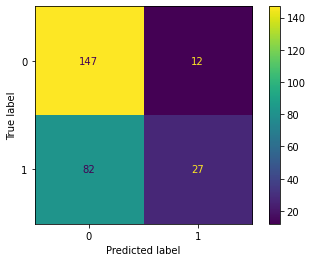

In [102]:
plot_confusion_matrix(SVC_model, X_test, y_test)

## 🟣Acuracy

In [103]:
accuracy_score(y_test, y_pred)

0.6492537313432836

## 🟣 Precision Score

In [104]:
precision_score(y_test, y_pred)

0.6923076923076923

## 🟣 Recall score

In [105]:
recall_score(y_test, y_pred)

0.24770642201834864

## 🟣 F1-score

In [106]:
f1_score(y_test, y_pred)

0.36486486486486486

# Step21: Final Model
<hr>
<h1> Hyperparameters
<h4> Choosing the best hyperparameters through GridSearchCV

## 🟣 Fit model with the best hyperparameters

In [107]:
from sklearn.model_selection import GridSearchCV

In [109]:
svm2 = SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear','rbf']}
grid = GridSearchCV(svm2 ,param_grid, cv=5)

In [110]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [111]:
grid.best_estimator_

SVC(C=1000, gamma=1, kernel='linear')

In [112]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

## 🟣 Predict

In [113]:
y_pred_grid= grid.predict(X_test)

## 🟣 Evaluating the Model

### Confusion Matrix

In [114]:
confusion_matrix(y_test, y_pred_grid)

array([[135,  24],
       [ 39,  70]], dtype=int64)

#### Classification Report

In [115]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       159
           1       0.74      0.64      0.69       109

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



#### Plot Confusion Matrix

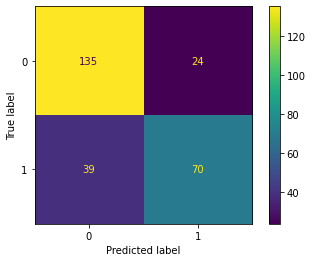

In [117]:
plot_confusion_matrix(grid, X_test, y_test)

### Acuracy

In [131]:
ASg = accuracy_score(y_test, y_pred_grid)
ASg

0.7649253731343284

### Precision Score

In [129]:
PSg = precision_score(y_test, y_pred_grid)
PSg

0.7446808510638298

### Recall score

In [127]:
RSg = recall_score(y_test, y_pred_grid)
RSg

0.6422018348623854

### F1-score

In [128]:
FSg = f1_score(y_test, y_pred_grid)
FSg

0.689655172413793

# Step22: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [137]:
grid_M_df = pd.DataFrame({"Grid Metrics" : ["Accuracy", "Precision", "Recall", "F1-score"] , "Grid Scores" : [ASg, PSg, RSg, FSg]})
grid_M_df

,Grid Metrics,Grid Scores
0,Accuracy,0.764925
1,Precision,0.744681
2,Recall,0.642202
3,F1-score,0.689655


# Step23: Create DataFrame From Accuracy & Precision & Recall & F1-score
<hr>
<h3>Concanate All Models dataframes (Step10, Step17, Step22)

In [142]:
comparison = pd.concat([Logistic_M_df, pipe_M_df, grid_M_df], axis = 1 )
comparison

,Logistic Metrics,Logistic Scores,Pipe Metrics,Pipe Scores,Grid Metrics,Grid Scores
0,Accuracy,0.787313,Accuracy,0.820896,Accuracy,0.764925
1,Precision,0.765306,Precision,0.858824,Precision,0.744681
2,Recall,0.688073,Recall,0.669725,Recall,0.642202
3,F1-score,0.724638,F1-score,0.752577,F1-score,0.689655
